কে ফোল্ড ক্রস ভ্যালেইডেশন সম্পর্কে আলোচনায় যাবার আগে আমরা একটি ছোট্ট উদাহরণ সম্পর্কে আলোচনা করবো। নিচের উদাহরণটি লক্ষ্য করুন, ধরুন একটি ক্লাসে ১০ জন শিক্ষার্থী রয়েছে এবং আপনার কাছে তাদের ওজনের ডেটাসেট রয়েছে , এখান থেকে আপনি র‍্যান্ডমলি ৪ জনের স্যাম্পল বাছাই করতে চান। প্রথম বার আপনি ৪ জনকে র‍্যান্ডমলি সিলেক্ট করলেন এবং ১ম স্যাম্পলের জন্য তাদের গড় ওজন পাওয়া গেল ৫৩.২৫ কেজি। আপনি আবার চার জনকে র‍্যান্ডমলি সিলেক্ট করলেন এবং ২য় স্যাম্পলের জন্য তাদের গড় ওজন পাওয়া গেল ৬৯ কেজি। আপনি আবারও চার জনকে র‍্যান্ডমলি সিলেক্ট করলেন, ৩য় স্যাম্পলের জন্য তাদের গড় ওজন পাওয়া গেল ৫৫.৫ কেজি।<br>
উপরের উদাহরনে আমরা দেখতে পেলাম তিনটি স্যাম্পলে গড় ওজন তিন ধরনের পাওয়া যাচ্ছে, অর্থাৎ ডেটাসেট একই থাকলেও ভিন্ন ভিন্ন র‍্যান্ডম স্যাম্পলের জন্য ফলাফলে পার্থক্য আসতে পারে।
কে ফোল্ড ক্রস ভ্যালেইডেশন হচ্ছে একটি বিশেষ পদ্ধতি যার মাধ্যমে একই ডেটাসেটের একাধিক সাবসেট তৈরি করে মেশিন লার্নিং মডেল তৈরি করা হয়, এরফলে ভিন্ন ভিন্ন সাবসেটের জন্য মডেলের প্রিডিকশন অ্যাকুরেসিও আলাদা আলাদা হয়। মনে করুন আমারা একটি ডেটাসেটের জন্য ৫ টি সাবসেট তৈরি করবো, প্রতিটি সাবসেটে থাকা ডেটার সাইজ সমান। এই সাবসেট সমূহকে বলা হয় ফোল্ড। অর্থাৎ আমরা আমাদের ডেটাসেটকে ৫ টি সমান ফোল্ডে ভাগ করলাম।  ফোল্ডের সংখ্যাকে ‘কে’ দ্বারা প্রকাশ করা হয়। আমাদের এই উদাহরণের জন্য ‘কে’-এর মান ৫।<br>
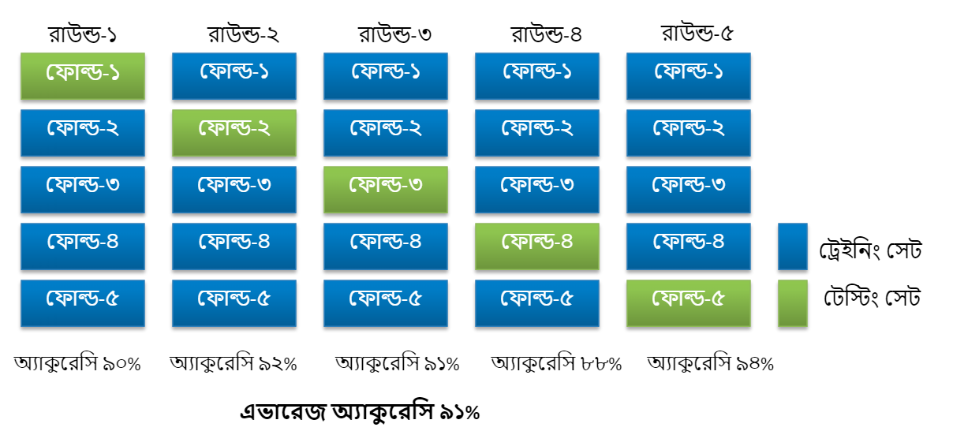<br>
এবার চারটি ফোল্ডকে ট্রেইনিং সেট এবং একটি ফোল্ডকে টেস্ট সেট হিসাবে ব্যবহার করে সাধারনত আমরা মডেল তৈরি করে থাকি। কে ফোল্ড ক্রস ভ্যালেইডেশনের ক্ষেত্রে ১ম বারের পরেও আরও কয়েকবার একই পদ্ধতির পুনরাবৃত্তি করা হয়।  ‘কে’-এর সমান সংখ্যকবার আলাদা আলাদা ফোল্ড ব্যবহার করে ট্রেইনিং ও টেস্টিং সেটের মাধ্যমে মডেল তৈরি করা হয়। প্রথমবার যে ফোল্ডটিকে টেস্ট সেট হিসাবে ব্যবহার করা হয়, ২য় বার আর সেটিকে টেস্ট সেটে ব্যবহার করা হয়না, বরং সেটিকে ট্রেইনিং সেটে যুক্ত করে ট্রেইনিং সেটের আরেকটি ফোল্ডকে টেস্ট সেটে ব্যবহার করা। এভাবে ‘কে’ সংখ্যক বার একই পদ্ধতির পুনরাবৃত্তি করা হয়। এর ফলে প্রতিবারেই ট্রেইনিং এবং টেস্ট সেটের ডেটায় ভিন্নতা থাকে এবং ফলাফল হিসাবে প্রতিটি মডেলেই প্রিডিকশন অ্যাকুরেসিতে কিছুটা পার্থক্য থাকতে পারে।<br>
কে ফোল্ড ক্রস ভ্যালেইডেশনের মাধ্যমে আমরা বুঝতে পারি কোন মডেল ভিন্ন ভিন্ন ডেটার ক্ষেত্রে তার অ্যাকুরেসি পারফরম্যান্সে কতখানি পরিবর্তিত হয় এবং সার্বিক ভাবে ভিন্ন ভিন্ন ডেটার ক্ষেত্রে অ্যাভারেজ অ্যাকুরেসি কত।<br>

# Code

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [4]:
#KFold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in kf.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [5]:
scores_logistic

[0.8964941569282137, 0.9515859766277128, 0.9115191986644408]

In [6]:
scores_svm

[0.41068447412353926, 0.41569282136894825, 0.4273789649415693]

In [7]:
scores_rf

[0.9365609348914858, 0.9499165275459098, 0.9198664440734557]

In [8]:
#Stratified K Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [9]:
scores_rf

[0.9232053422370617, 0.9415692821368948, 0.9282136894824707]

# Parameter tunning using k fold cross validation

In [11]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

0.8753600248292986

In [12]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

0.9360180012414648

In [13]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores3)

0.9421135940409682

In [14]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)

0.948792675356921

Here we used cross_val_score to fine tune our random forest classifier and figured that having around 40 trees in random forest gives best result.